In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**We always begin *any* NN by defining a class that inherits from the nn.Module class**

In [ ]:
class Model(nn.Module):
  # Define the 2 basic method, and instatiation method and a feedforward method that "moves data from one neuron to the next"
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    # all the features are initialized assuming we know what the features that are passed as input and the possible guess or outputs are known!
    # h1 and h2 are the hidden layers and can be played around with!
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) # fc1 is fully conected layer from in to first hidden layer
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features) # By convention, the last connection should be called 'out' as it connects to the output layer

#Play around with normalizing inputs and outputs (i.e. F.tanh, F.LeakyReLU, etc).

  def forward(self, x_input):
    # This is where the data is propagated and analized forward, we take x_input and pass it through some activation function
    # forward, all the way to the end
    
    # pass the first input layer through the Relu activation funtion and we let X be the output from the activation function:
    # X = Relu(x_input), such that fc2 = a*x + b
    X = F.relu(self.fc1(x_input))
    X = F.relu(self.fc2(X))
    X = self.out(X)
    return X

We can instatiate the model. Since we did not initiallized the weights and biases by hand, the nn.Linear will randomly pick it for us.

In [ ]:
model = Model()

**Let us import the data. I've stored the data set within a folder called "Data" inside the directory where this notebook is.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Pytorch/Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
x = df.drop('target', axis=1) #since we want to train the data, it shouldn't have to know what the expected output is just yet
y = df['target'] #this are now the expected values

**ALWAYS work with np.arrays or tensors. So if the data is not in that format, we can convert with built-in pytorch functions.**

In [ ]:
x = x.values
y = y.values

**A good place to start is by creating training sets. Scikit learn takes a data set, and shuffles the data so that the model is not memorizing but rather learning.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

**For consistency, we want the training values and testing values to be in float tensor forms!**

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

**Let us define a cost function and an optimizer**

In [ ]:
#Since this is a multiclass classification problem, CEL function is best to use.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

**Time to train the model. A question to ask is what's a good amount of epochs to train the model for?**

In [ ]:
epochs = 120
losses = []

for i in range(epochs):
  # For every pass we make on the data set, we want to make a prediction, and keep track of the losses, then optimize.
  # 1. predict
  y_predicted = model.forward(X_train)

  # 2. calculate loss/error, then record
  loss = criterion(y_predicted, y_train)
  losses.append(loss)

  # Perform backpropagation: optimize the weights an biases and propagate backwards to adjust the w and b of the previous layers
  optimizer.zero_grad() # finds minima (local or global)
  loss.backward() # backpropagates
  optimizer.step() # resets gradients


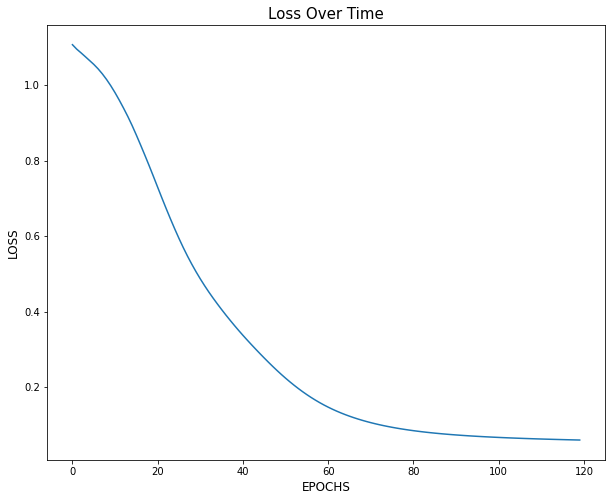

In [ ]:
#lets visualize the losses
plt.figure(figsize=(10,8))
plt.plot(range(epochs), losses)
plt.ylabel('LOSS', size=12)
plt.xlabel('EPOCHS', size=12)
plt.title('Loss Over Time', size=15);
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Pytorch/Iris_loss_over_time.png', dpi=300);

**Let's test its peformace against the test data.**

In [ ]:
with torch.no_grad(): # We use this line to preserve the current model features (w and b)
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'The total loss for this test was {loss}')

The total loss for this test was 0.0627010241150856


**Let's see a better visualization of its performance by checking the total number of right predictions**

In [ ]:
correct = 0
predictions = []
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred = model.forward(data)
    predictions.append(y_pred.argmax().item())

    # Lets print its prediction against the actual data point!
    print(f'{i+1}.) prediction: {str(y_pred.argmax().item())}  actual: {y_test[i]}')

    if y_pred.argmax().item() == y_test[i]:
      correct +=1

print(f'\nThe correct number of predictions was {correct}/{len(predictions)}!')
print(f"That's a {round(correct/30 * 100, 2)}% success rate!")

1.) prediction: 1  actual: 1
2.) prediction: 1  actual: 1
3.) prediction: 0  actual: 0
4.) prediction: 1  actual: 1
5.) prediction: 2  actual: 2
6.) prediction: 2  actual: 2
7.) prediction: 0  actual: 0
8.) prediction: 0  actual: 0
9.) prediction: 2  actual: 2
10.) prediction: 2  actual: 2
11.) prediction: 2  actual: 2
12.) prediction: 0  actual: 0
13.) prediction: 2  actual: 2
14.) prediction: 1  actual: 1
15.) prediction: 2  actual: 2
16.) prediction: 1  actual: 1
17.) prediction: 2  actual: 2
18.) prediction: 0  actual: 0
19.) prediction: 1  actual: 1
20.) prediction: 2  actual: 2
21.) prediction: 0  actual: 0
22.) prediction: 0  actual: 0
23.) prediction: 2  actual: 2
24.) prediction: 0  actual: 0
25.) prediction: 2  actual: 2
26.) prediction: 2  actual: 2
27.) prediction: 1  actual: 1
28.) prediction: 1  actual: 1
29.) prediction: 2  actual: 2
30.) prediction: 2  actual: 2

The correct number of predictions was 30/30!
That's a 100.0% success rate!


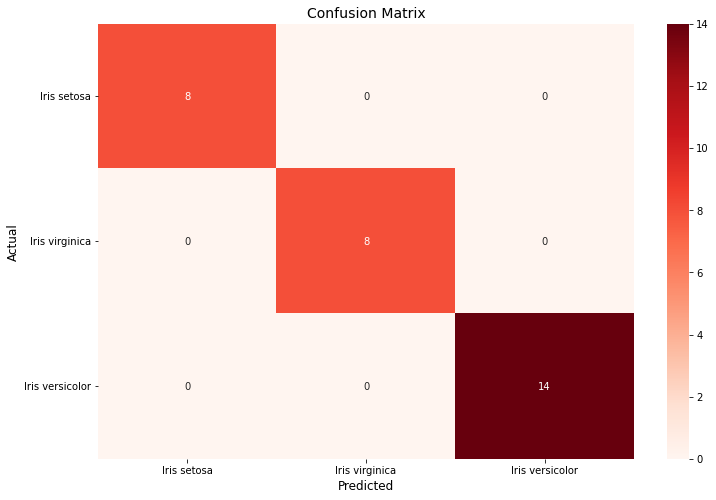

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True, cmap='Reds',fmt='d');
plt.title('Confusion Matrix', size=14);
plt.xlabel('Predicted', size=12)
plt.ylabel('Actual', size=12)
labels = ['Iris setosa','Iris virginica','Iris versicolor']
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=labels, rotation=0)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=labels);
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Pytorch/Iris_confusion_matrix.png', dpi=300);

**Say that we are happy with our model. Let's now save it!**

In [ ]:
#This only saves the current weight and bias of the model but not the entire class!
torch.save(model.state_dict(), 'My_iris_model.pt')

'''If we wanted to save the entire model, we would use:
torch.save(model, 'name_of_file.pkl')
and it MUST be saved as a pickle file!'''

"If we wanted to save the entire model, we would use:\ntorch.save(model, 'name_of_file.pkl')\nand it MUST be saved as a pickle file!"

To load the model for later use. You either must redefine the same exact class used to create or save the file as a pkl file to have access to all of it.

In [ ]:
new_model = Model() #instatiate a new model. This new model will have randomized w and b values
new_model.load_state_dict(torch.load('My_iris_model.pt'))

<All keys matched successfully>

**Let's test our model against unseen data to see it's efficiency!**

In [ ]:
new_flower = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [ ]:
with torch.no_grad():
    print(new_model(new_flower))
    print(f'\nPredicted: {labels[new_model(new_flower).argmax()]}')
    print(f'We expected {labels[0]}!')

tensor([ 15.6965,  11.1027, -16.0000])

Predicted: Iris setosa
We expected Iris setosa!
